In [1]:
from __future__ import division
from astropy.io import fits
%matplotlib nbagg
import numpy as np
import matplotlib.pyplot as plt

In [2]:
path = r'/Users/caridlin/Documents/KCWI20210209_cgm/kb210209_00099.fits'


image = fits.open(path)
h = image[0].header
c = image[0].data

In [3]:
# Find Amp1 & 2 region
x_signal = np.sum(c, axis = 0)
y_signal = np.sum(c, axis = 1)
a = h['DSEC1']
b = h['DSEC2']
a1 = a.split(',')[0]
a2 = a.split(',')[1]
b1 = b.split(',')[0]
b2 = b.split(',')[1]
print(a1, a2)
print(b1, b2)
c1 = int(a1[a1.find('[') + 1: a1.find(':')])
c2 = int(a1[a1.find(':') + 1: ])
d1 = int(b1[b1.find('[') + 1: b1.find(':')])
d2 = int(b1[b1.find(':') + 1: ])
e1 = int(a2[: a2.find(':')])
e2 = int(a2[a2.find(':') + 1: a2.find(']')])
print(c1, c2, d2, d1, e1, e2)

[30:1053 1:2056]
[2271:1248 1:2056]
30 1053 1248 2271 1 2056


<IPython.core.display.Javascript object>


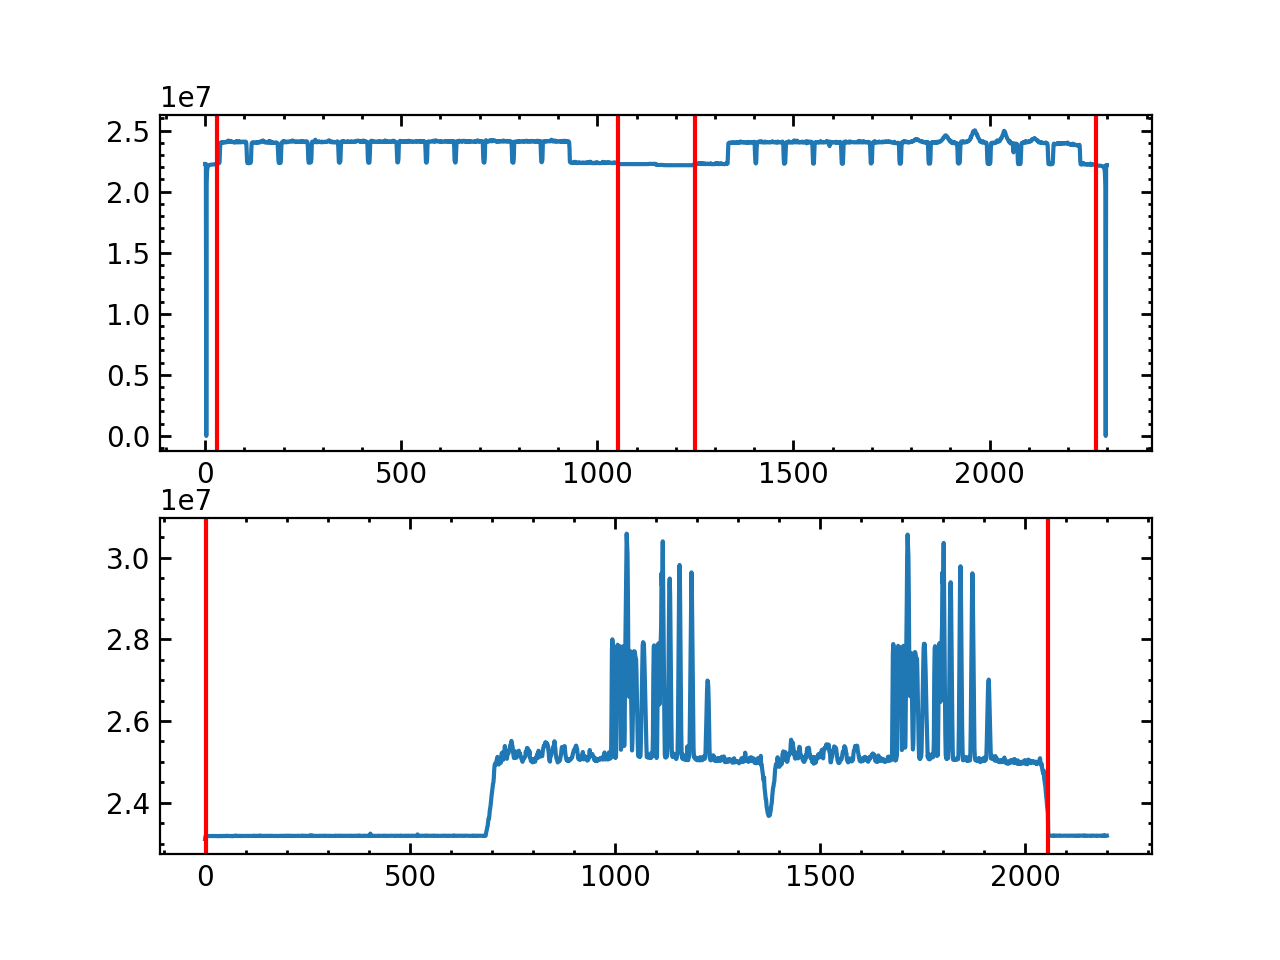

In [4]:
# Pot Amp1 & 2 region
fig, ax = plt.subplots(2, 1)
ax[0].plot(x_signal)
ax[0].axvline(c1, color = 'red')
ax[0].axvline(c2, color = 'red')
ax[0].axvline(d2, color = 'red')
ax[0].axvline(d1, color = 'red')
ax[1].plot(y_signal)
ax[1].axvline(e1, color = 'red')
ax[1].axvline(e2, color = 'red')

ax[0].tick_params(axis = 'both', top = True, right = True, direction='in', length=4, width=1, colors='black',
               grid_color='black', grid_alpha=0.5)
ax[0].minorticks_on()
ax[0].tick_params(axis = 'both', which = 'minor', top = True, right = True, direction='in', length=1.5, width=1, colors='black',
               grid_color='black', grid_alpha=0.5)

ax[1].tick_params(axis = 'both', top = True, right = True, direction='in', length=4, width=1, colors='black',
               grid_color='black', grid_alpha=0.5)
ax[1].minorticks_on()
ax[1].tick_params(axis = 'both', which = 'minor', top = True, right = True, direction='in', length=1.5, width=1, colors='black',
               grid_color='black', grid_alpha=0.5)

In [5]:
# Find 0 pixels
index1 = np.argwhere(c[e1:e2, c1:c2] == 0)
index2 = np.argwhere(c[e1:e2, d2:d1] == 0)

<IPython.core.display.Javascript object>


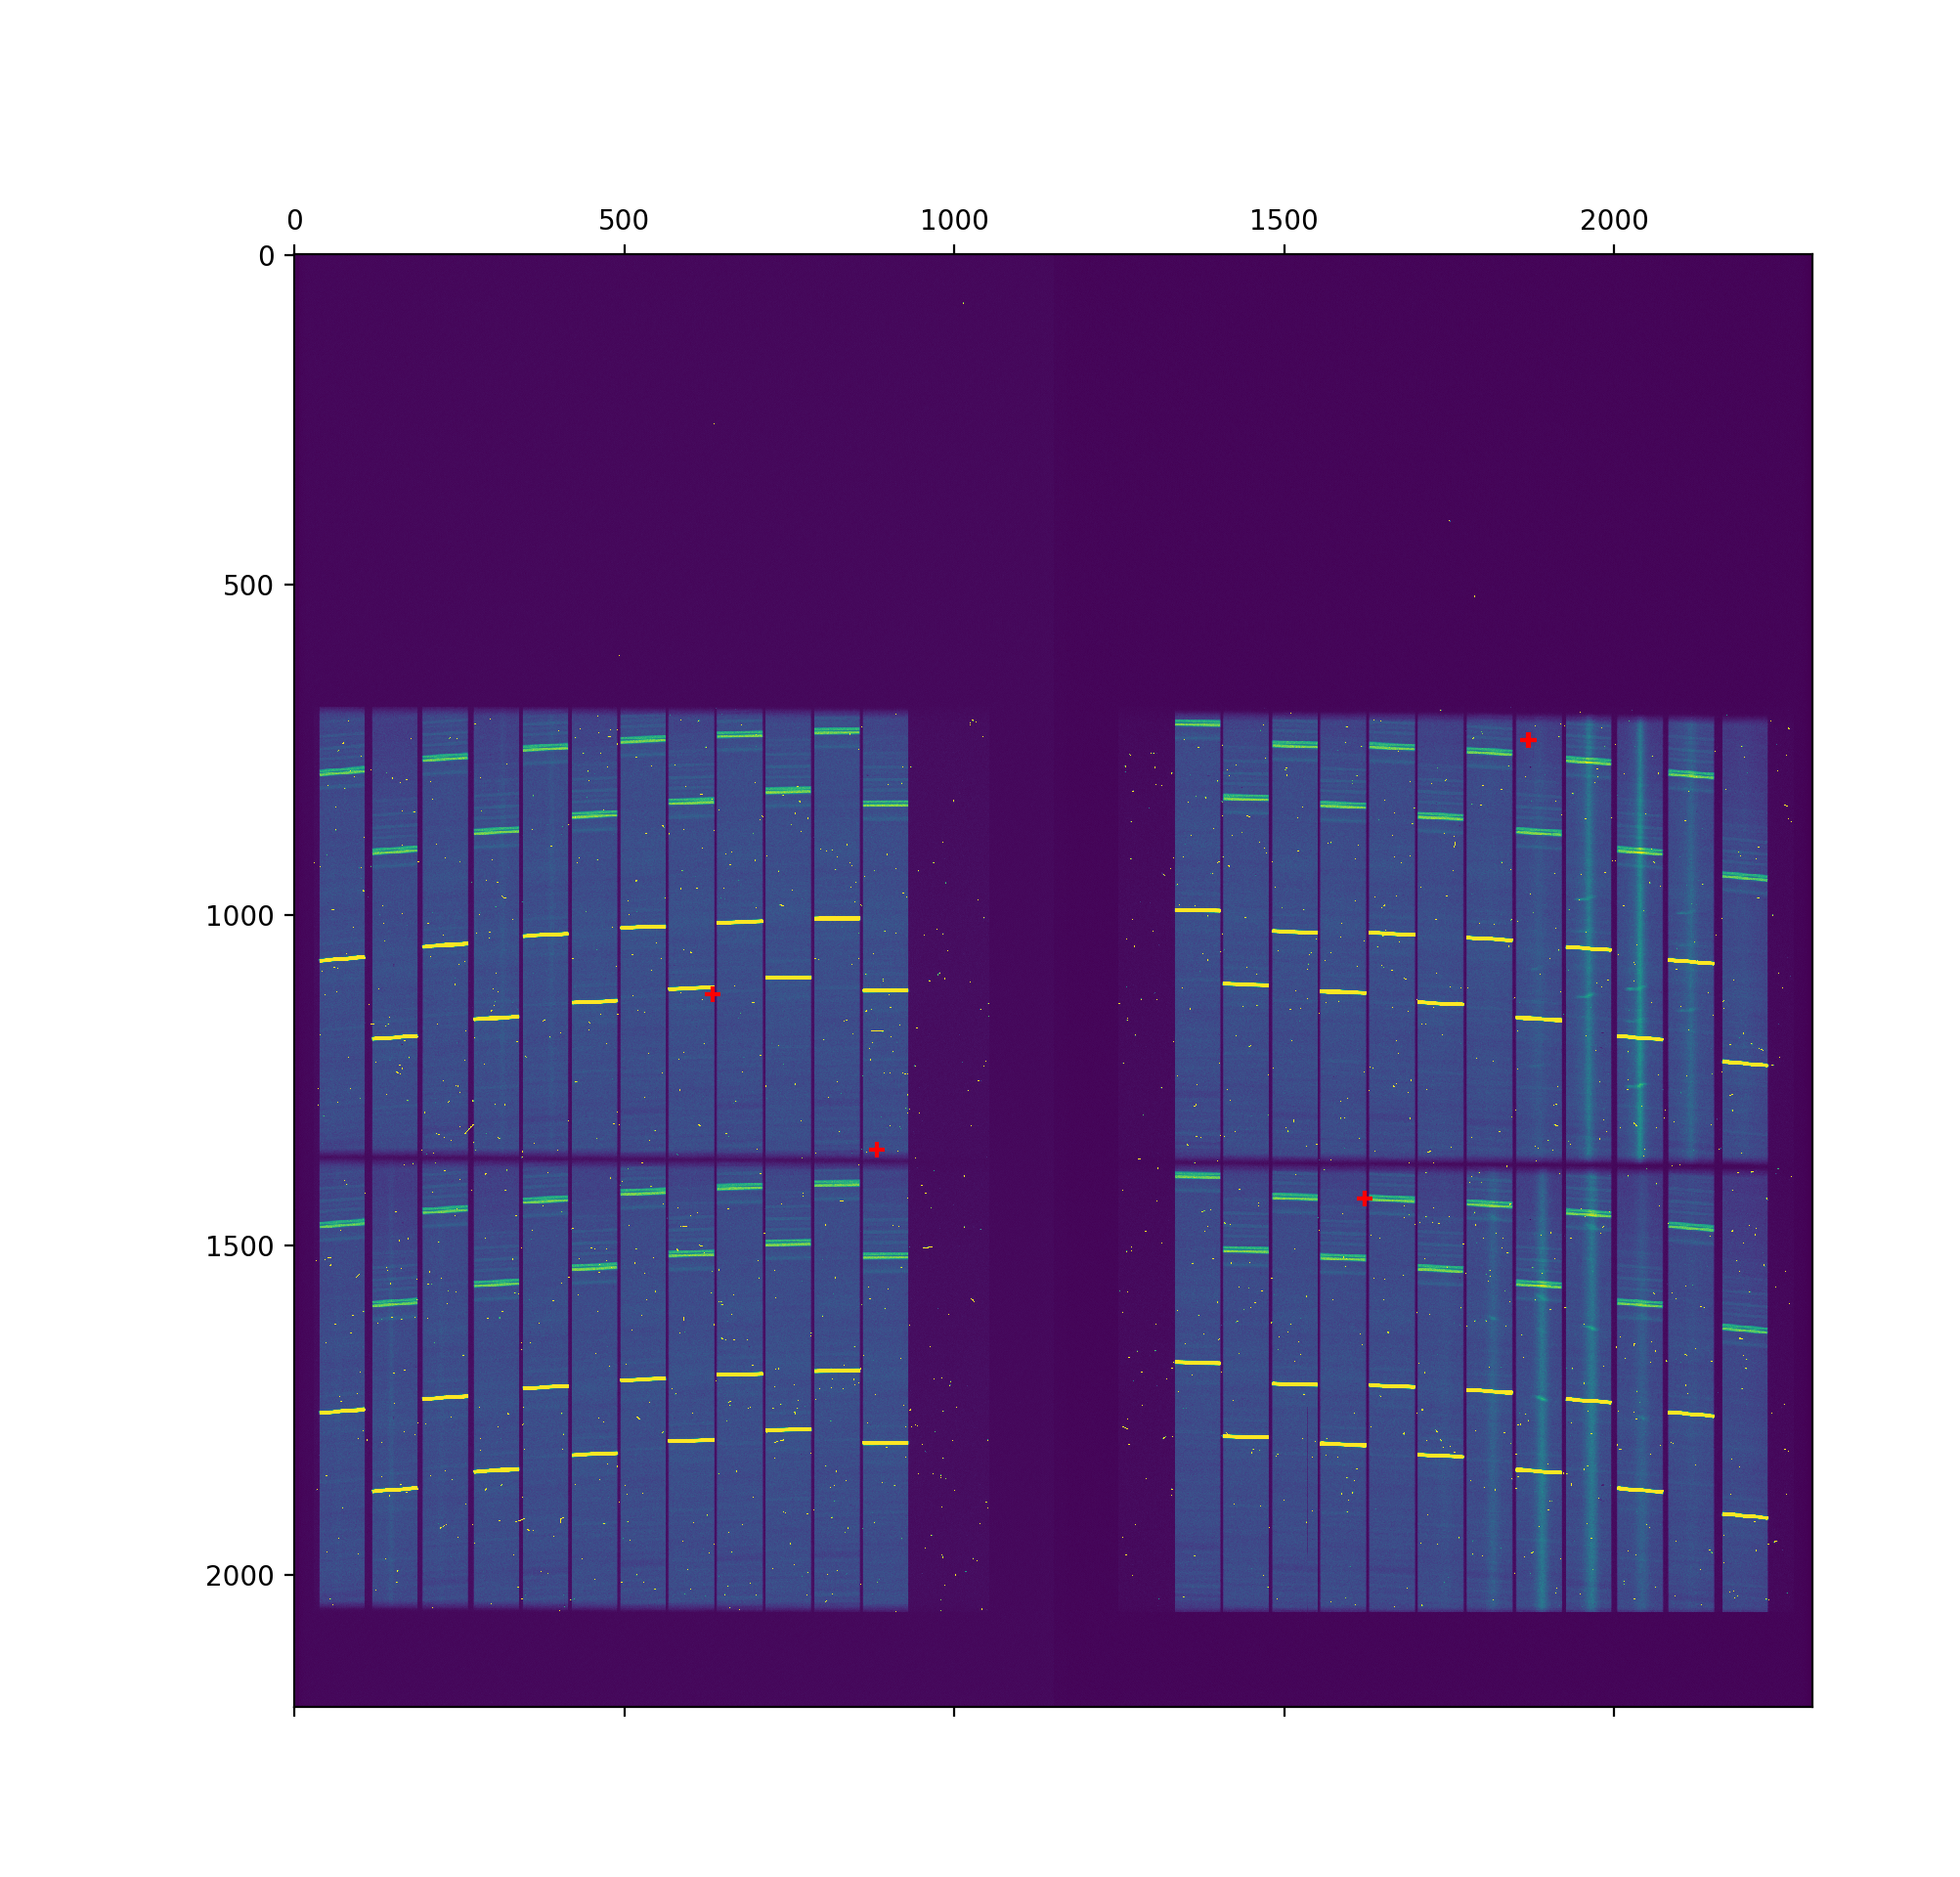

In [6]:
# Plot o pixels
plt.matshow(c, vmin = 1e4, vmax = 1.5e4)
plt.scatter(c1 + index1[:, 1], e1 + index1[:, 0], color = 'red', marker = '+')
plt.scatter(d2 + index2[:, 1], e1 + index2[:, 0], color = 'red', marker = '+')

In [7]:
# Change 0 pixels to 65535
c[e1 + index1[:, 0], c1 + index1[:, 1]] = 65535
c[e1 + index2[:, 0], d2 + index2[:, 1]] = 65535

<IPython.core.display.Javascript object>


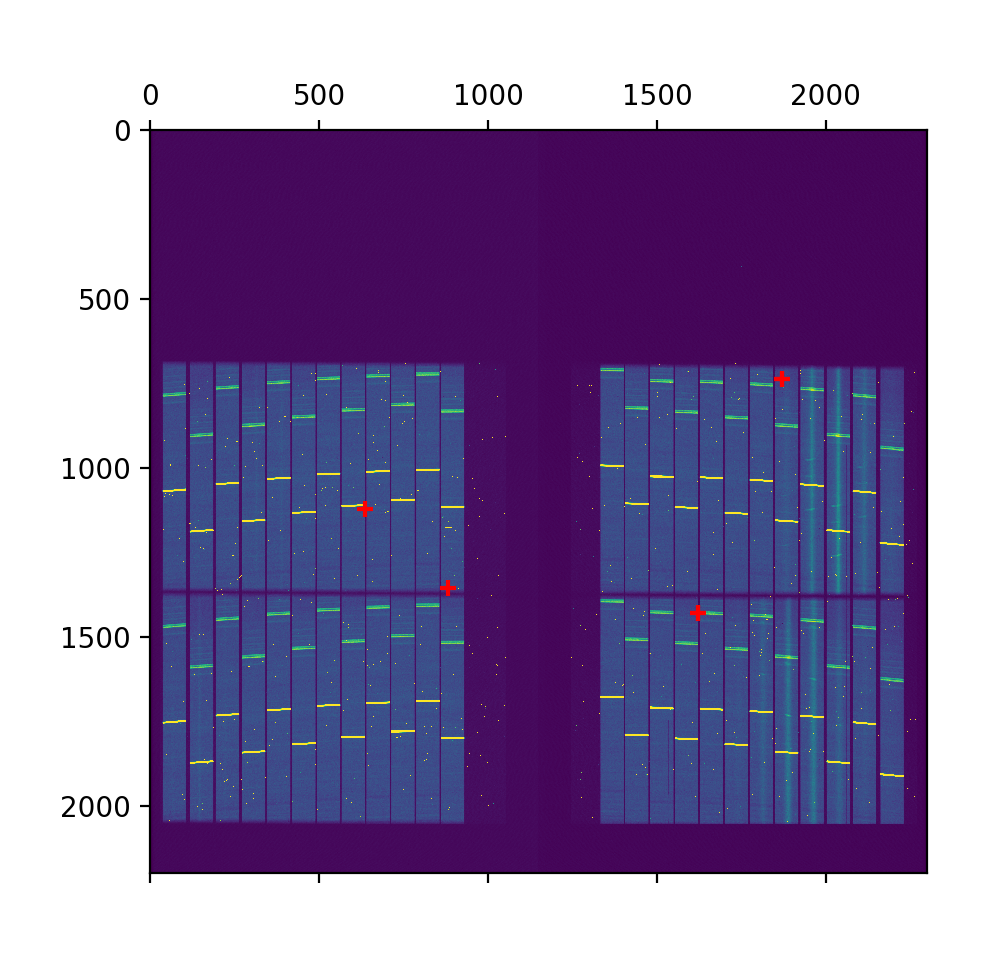

In [8]:
# Replot to see the changes
plt.matshow(c, vmin = 1e4, vmax = 1.5e4)
plt.scatter(c1 + index1[:, 1], e1 + index1[:, 0], color = 'red', marker = '+')
plt.scatter(d2 + index2[:, 1], e1 + index2[:, 0], color = 'red', marker = '+')

In [433]:
# Save
hdu = fits.PrimaryHDU(c)
hdulist = fits.HDUList([hdu])
hdulist[0].header = h
hdulist.writeto(path.split('.')[0] + '_cr.fits', clobber=True)